# Análise de Carga e Descarga do Circuito RC

Este notebook processa dados do monitor serial para gerar gráficos de carga no capacitor (C) e descarga no resistor (R).

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configurar o estilo dos gráficos
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

In [12]:
# Dados do monitor serial
dados_texto = """4021 5.00 0.00
4422 4.84 0.16
4825 4.65 0.35
5227 4.47 0.53
5629 4.29 0.71
6031 4.12 0.88
6433 3.96 1.04
6836 3.80 1.20
7238 3.65 1.35
7641 3.51 1.49
8042 3.37 1.63
8444 3.24 1.76
8847 3.11 1.89
9249 2.99 2.01
9652 2.87 2.13
10053 2.76 2.24"""

# Processar os dados
linhas = dados_texto.strip().split('\n')
tempo = []
vc = []  # Tensão no capacitor
vr = []  # Tensão no resistor

for linha in linhas:
    valores = linha.split()
    tempo.append(int(valores[0]))    
    vr.append(float(valores[1]))
    vc.append(float(valores[2]))

# Criar DataFrame
df = pd.DataFrame({
    'Tempo (ms)': tempo,
    'Vc (V)': vc,
    'Vr (V)': vr
})

print("Primeiras linhas dos dados:")
print(df.head(10))
print(f"\nTotal de pontos: {len(df)}")

Primeiras linhas dos dados:
   Tempo (ms)  Vc (V)  Vr (V)
0        4021    0.00    5.00
1        4422    0.16    4.84
2        4825    0.35    4.65
3        5227    0.53    4.47
4        5629    0.71    4.29
5        6031    0.88    4.12
6        6433    1.04    3.96
7        6836    1.20    3.80
8        7238    1.35    3.65
9        7641    1.49    3.51

Total de pontos: 16


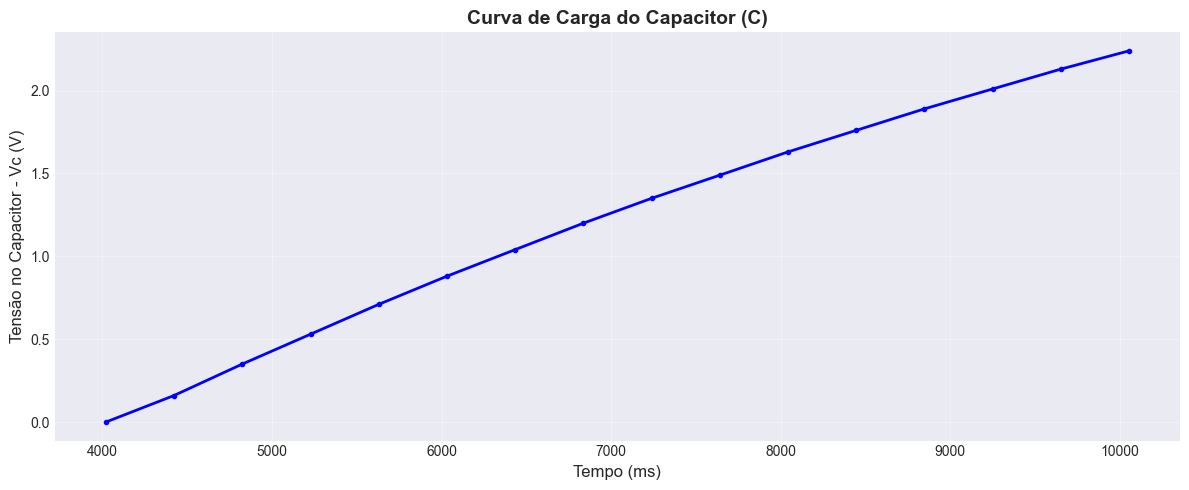

Análise da Carga do Capacitor:
Tensão inicial: 0.00 V
Tensão máxima: 2.24 V
Tensão final: 2.24 V


In [13]:
# Gráfico de Carga do Capacitor (Vc)
plt.figure(figsize=(12, 5))
plt.plot(df['Tempo (ms)'], df['Vc (V)'], 'b-', linewidth=2, marker='o', markersize=3)
plt.xlabel('Tempo (ms)', fontsize=12)
plt.ylabel('Tensão no Capacitor - Vc (V)', fontsize=12)
plt.title('Curva de Carga do Capacitor (C)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Análise da Carga do Capacitor:")
print(f"Tensão inicial: {df['Vc (V)'].iloc[0]:.2f} V")
print(f"Tensão máxima: {df['Vc (V)'].max():.2f} V")
print(f"Tensão final: {df['Vc (V)'].iloc[-1]:.2f} V")

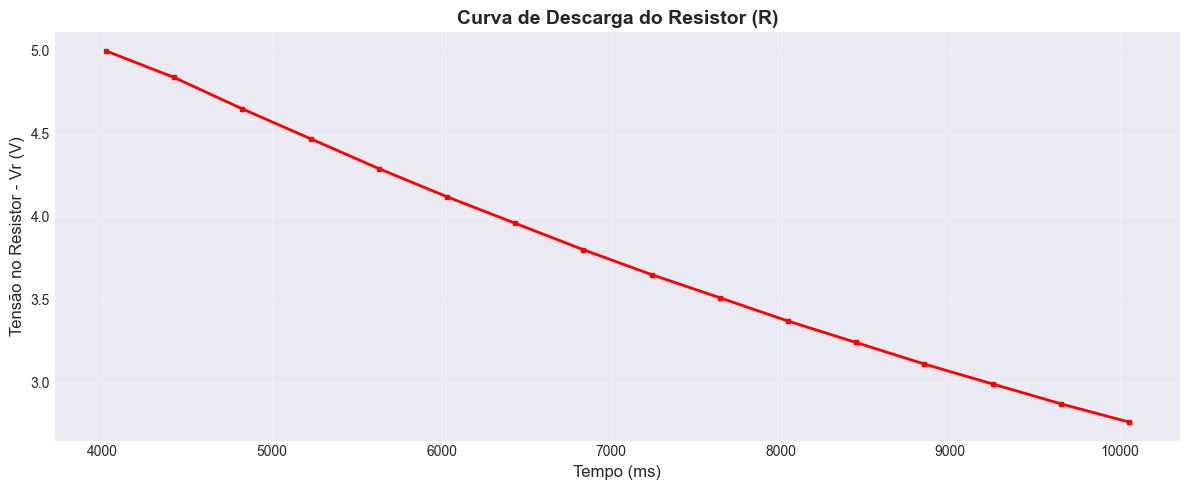

Análise da Descarga do Resistor:
Tensão inicial: 5.00 V
Tensão máxima: 5.00 V
Tensão final: 2.76 V


In [14]:
# Gráfico de Descarga do Resistor (Vr)
plt.figure(figsize=(12, 5))
plt.plot(df['Tempo (ms)'], df['Vr (V)'], 'r-', linewidth=2, marker='s', markersize=3)
plt.xlabel('Tempo (ms)', fontsize=12)
plt.ylabel('Tensão no Resistor - Vr (V)', fontsize=12)
plt.title('Curva de Descarga do Resistor (R)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Análise da Descarga do Resistor:")
print(f"Tensão inicial: {df['Vr (V)'].iloc[0]:.2f} V")
print(f"Tensão máxima: {df['Vr (V)'].max():.2f} V")
print(f"Tensão final: {df['Vr (V)'].iloc[-1]:.2f} V")

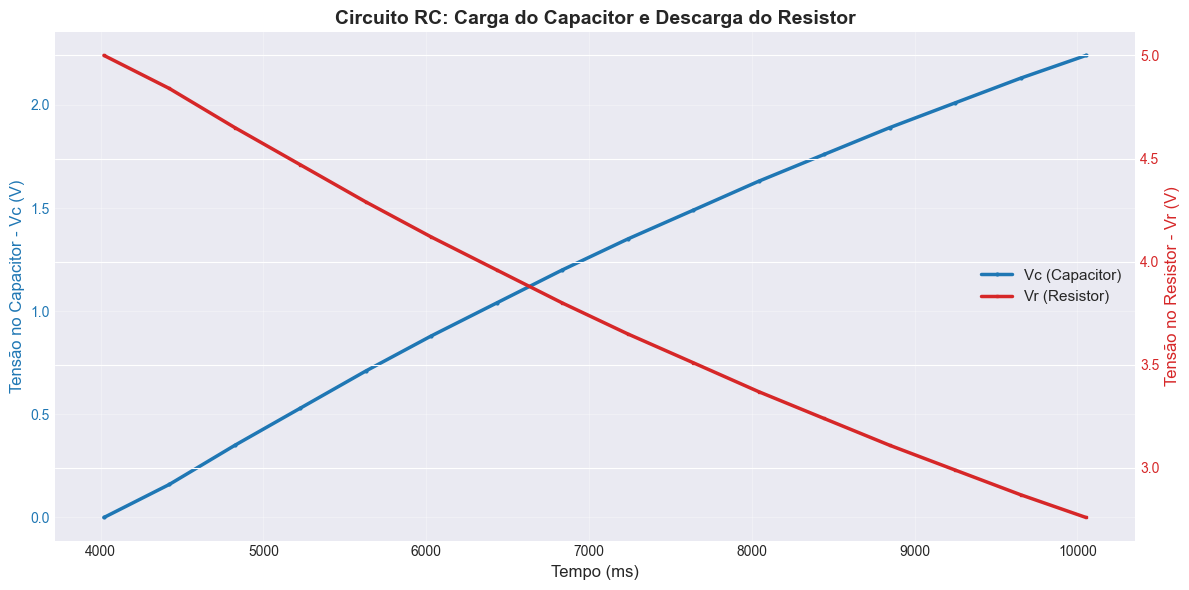

Os gráficos mostram claramente o comportamento do circuito RC:
- Vc aumenta durante a carga (curva azul)
- Vr diminui durante a descarga (curva vermelha)
- Quando Vc = 5V, há reinicialização do circuito


In [15]:
# Gráfico Combinado - Vc e Vr
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eixo 1: Tensão no Capacitor (Vc)
color = 'tab:blue'
ax1.set_xlabel('Tempo (ms)', fontsize=12)
ax1.set_ylabel('Tensão no Capacitor - Vc (V)', color=color, fontsize=12)
line1 = ax1.plot(df['Tempo (ms)'], df['Vc (V)'], color=color, linewidth=2.5, marker='o', markersize=2, label='Vc (Capacitor)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Eixo 2: Tensão no Resistor (Vr)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Tensão no Resistor - Vr (V)', color=color, fontsize=12)
line2 = ax2.plot(df['Tempo (ms)'], df['Vr (V)'], color=color, linewidth=2.5, marker='s', markersize=2, label='Vr (Resistor)')
ax2.tick_params(axis='y', labelcolor=color)

# Legenda combinada
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='center right', fontsize=11)

plt.title('Circuito RC: Carga do Capacitor e Descarga do Resistor', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

print("Os gráficos mostram claramente o comportamento do circuito RC:")
print("- Vc aumenta durante a carga (curva azul)")
print("- Vr diminui durante a descarga (curva vermelha)")
print("- Quando Vc = 5V, há reinicialização do circuito")